# Geração e Agrupamento do Dataset

Importante:
> * Em outra máquina setar os diretórios correspondentes, para que fique OK.
> * Mudar o número de classes do dataset também, para que fique OK.

O [Image Generator](https://keras.io/preprocessing/image/) no método flow_from_directory tem um parâmetro "classes", que da para definir quais pastas ele vai selecionar.

O dataset vai ser salvo em um arquivo h5, usando o [h5py](docs.h5py.org/en/latest/high/dataset.html), para leitura depois basta pegar o "x", e "y" do dataset criado no arquivo H5.

In [5]:
import os
dataset_dir = "/media/rodsnjr/Files/Datasets/gvc_dataset-master"
numpy_dataset_dir = "/media/rodsnjr/Files/Datasets/gvc_npy/"

if not (os.path.exists(numpy_dataset_dir)):
    os.mkdir(numpy_dataset_dir)

labels = [name for name in os.listdir(dataset_dir)]
num_classes = len(labels)

def get_label(one_hot_encode):
    intw = np.where(one_hot_encode == 1)[0][0]
    print(intw)
    return labels[intw]

print(labels)
print(os.path.exists(dataset_dir))
print(os.path.exists(numpy_dataset_dir))

['Doors', 'Doors_Open', 'Stairs', 'Doors_Lift', 'Indoor_Stairs_Doors', 'Stairs_Top_View', 'Doors_Half_Open', 'Indoor Environment', 'Doors_Stairs', 'Doors_Double', 'Doors_Constructions']
True
True


In [6]:
import h5py

def generate_dataset(directory=None, dataset_file=None, generator=None, 
                     generator_batch_size=500, stop_condition=50):

    start = 0
    end = generator_batch_size
    
    dataset_file= "%s.h5" % dataset_file
    
    with h5py.File(numpy_dataset_dir + dataset_file, 'w') as hf:
        # O tamanho das imagens vai ficar o padrão do Inception/VGG 224,224,3.
        hf.create_dataset("x", (stop_condition*generator_batch_size, 224, 224, 3))
        # São 11 classes
        hf.create_dataset("y", (stop_condition*generator_batch_size, 11))

        for index, batch in enumerate(train_flow, 1):
            print("Saving Batch %s" % index)
            print("Generated: %s" % batch[0].shape[0], "images")
            print("Indexing at %s to %s" % (start, end))
            
            # As vezes o Generator não cria exatamente o numero necessário de imagens
            # Isso deixa o dataset "desparelho", então é meio que break nessa condição
            if (batch[0].shape[0] == generator_batch_size):
                hf['x'][start:end] = batch[0]
                hf['y'][start:end] = batch[1]

                start += generator_batch_size
                end += generator_batch_size
                if index >= stop_condition:
                    break
            else:
                print("Generator failed in creating exactly %s images", generator_batch_size)
                stop_condition+=1

    size = end
    print("size ", size)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

img_height = 224
img_width = 224

gen_batch_size = 1000

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_flow = train_datagen.flow_from_directory(dataset_dir, 
                                  target_size = (img_height, img_width), 
                                  batch_size = gen_batch_size, 
                                  class_mode = "categorical",
                                    classes= labels)

Using TensorFlow backend.


Found 4909 images belonging to 11 classes.


In [4]:
# Vou gerar um dataset de treinamento
generate_dataset(directory=numpy_dataset_dir, dataset_file="train_doors",
                 generator=train_flow, generator_batch_size=gen_batch_size, stop_condition=10)

Saving Batch 1
Generated: 1000 images
Indexing at 0 to 1000
Saving Batch 2
Generated: 1000 images
Indexing at 1000 to 2000
Saving Batch 3
Generated: 1000 images
Indexing at 2000 to 3000
Saving Batch 4
Generated: 1000

/home/rodsnjr/.local/lib/python3.5/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 images
Indexing at 3000 to 4000
Saving Batch 5
Generated: 909 images
Indexing at 4000 to 5000
Generator failed in creating exactly %s images 1000
Saving Batch 6
Generated: 1000 images
Indexing at 4000 to 5000
Saving Batch 7
Generated: 1000 images
Indexing at 5000 to 6000
Saving Batch 8
Generated: 1000 images
Indexing at 6000 to 7000
Saving Batch 9
Generated: 1000 images
Indexing at 7000 to 8000
Saving Batch 10
Generated: 909 images
Indexing at 8000 to 9000
Generator failed in creating exactly %s images 1000
Saving Batch 11
Generated: 1000 images
Indexing at 8000 to 9000
Saving Batch 12
Generated: 1000 images
Indexing at 9000 to 10000
size  11000


In [5]:
# Agora um para validação, outro testes.
# Por enquanto deixa meio assim, depois separo melhores os diretórios, e as imagens
generate_dataset(directory=numpy_dataset_dir, dataset_file="test_doors",
                 generator=train_flow, generator_batch_size=gen_batch_size, stop_condition=5)

# Vou gerar um dataset de treinamento
generate_dataset(directory=numpy_dataset_dir, dataset_file="validation_doors",
                 generator=train_flow, generator_batch_size=gen_batch_size, stop_condition=5)

Saving Batch 1
Generated: 1000 images
Indexing at 0 to 1000
Saving Batch 2


/home/rodsnjr/.local/lib/python3.5/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Generated: 1000 images
Indexing at 1000 to 2000
Saving Batch 3
Generated: 909 images
Indexing at 2000 to 3000
Generator failed in creating exactly %s images 1000
Saving Batch 4
Generated: 1000 images
Indexing at 2000 to 3000
Saving Batch 5
Generated: 1000 images
Indexing at 3000 to 4000
Saving Batch 6
Generated: 1000 images
Indexing at 4000 to 5000
size  6000
Saving Batch 1
Generated: 1000 images
Indexing at 0 to 1000
Saving Batch 2
Generated: 909 images
Indexing at 1000 to 2000
Generator failed in creating exactly %s images 1000
Saving Batch 3
Generated: 1000 images
Indexing at 1000 to 2000
Saving Batch 4
Generated: 1000 images
Indexing at 2000 to 3000
Saving Batch 5
Generated: 1000 images
Indexing at 3000 to 4000
Saving Batch 6
Generated: 1000 images
Indexing at 4000 to 5000
size  6000


7


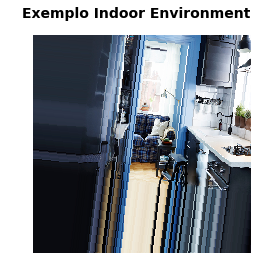

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import h5py

def get_dataset_files():
    # Carregar e ordenar corretamente os arquivos
    files = [name for name in os.listdir(numpy_dataset_dir)]
    files = sorted(files, key=lambda x: int(x.replace('gvc', '').replace('.h5', '')))
    
    return files

def load_dataset(directory, file, start_index=0, end_index=500):
    with h5py.File(os.path.join(directory, file),'r') as hf:
        x = hf["x"]
        y = hf["y"]

        return x[start_index:end_index], y[start_index:end_index]

x, y = load_dataset(numpy_dataset_dir, "test_doors.h5")

plt.figure()
plt.imshow(x[0])
plt.suptitle("Exemplo %s" % get_label(y[0]), fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

In [8]:
class FitGenerator():
    def __init__(self, directory, file):
        self.current_dataset = load_dataset(directory=directory, file=file, 
                                            start_index=0, end_index=6000)
        self.current_batch = 0
        self.next_batch = 6000

    def generator(self, batch_size=32):
        for i in range(self.next_batch):
            yield self.get_batch(batch_size)
            
    def get_batch(self, batch_size):
        if (self.current_batch+batch_size > self.next_batch):
            self.current_batch=0
        
        batch_x = self.current_dataset[0][self.current_batch : self.current_batch+batch_size]
        batch_y = self.current_dataset[1][self.current_batch : self.current_batch+batch_size]
        self.current_batch += batch_size
        
        if batch_x.shape[0] != batch_size:
            raise Exception("Batch Size is Wrong ", batch_x.shape[0])
        
        return batch_x, batch_y

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

generator = FitGenerator(directory=numpy_dataset_dir, file="validation_doors.h5")
test_generator = FitGenerator(directory=numpy_dataset_dir, file="test_doors.h5")

model.fit_generator(generator.generator(), epochs=10, steps_per_epoch=50)
score = model.evaluate_generator(test_generator.generator(), steps=20)

score

Epoch 1/10
50/50 [==============================] - 28s - loss: 2.2973 - acc: 0.3538    
Epoch 2/10
50/50 [==============================] - 19s - loss: 1.7400 - acc: 0.4088    
Epoch 3/10
46/50 [==========================>...] - ETA: 1s - loss: 1.6619 - acc: 0.4463

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/media/rodsnjr/Files/miniconda3/envs/indoor-recognition/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/media/rodsnjr/Files/miniconda3/envs/indoor-recognition/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rodsnjr/.local/lib/python3.5/site-packages/keras/utils/data_utils.py", line 560, in data_generator_task
    generator_output = next(self._generator)
  File "<ipython-input-8-c8a4114b57da>", line 10, in generator
    yield self.get_batch(batch_size)
  File "<ipython-input-8-c8a4114b57da>", line 21, in get_batch
    raise Exception("Batch Size is Wrong ", batch_x.shape[0])
Exception: ('Batch Size is Wrong ', 8)



47/50 [===========================>..] - ETA: 1s - loss: 1.6590 - acc: 0.4461

StopIteration: 